**DATASET DESCRIPTION**

This project uses a dataset designed for predicting a continuous numerical outcome related to financial or transactional behavior. The dataset contains multiple records with numerical and categorical attributes describing transaction patterns, user behavior, and financial indicators.

The dataset was accessed via Kaggle and loaded into a pandas DataFrame for analysis. It includes attributes such as transaction amounts, account characteristics, behavioral metrics, and other quantitative variables useful for predicting a target value.

 **UNSDG Alignment**

This dataset aligns with United Nations Sustainable Development Goal (UNSDG) 11: Sustainable cities and communities. Financial data analysis and predictive modeling support better economic decision-making and risk management.

By predicting financial trends or values accurately, regression models can help institutions improve financial planning, reduce risks, and support sustainable economic development

In [ ]:
# Basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

import kagglehub


In [ ]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("hassankhaled21/egyptian-real-estate-listings")

# Find CSV
files = [f for f in os.listdir(path) if f.endswith(".csv")]
csv_path = os.path.join(path, files[0])

# Load
df = pd.read_csv(csv_path)

df.head()


Using Colab cache for faster access to the 'egyptian-real-estate-listings' dataset.


,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             19924 non-null  object
 1   price           19385 non-null  object
 2   description     19846 non-null  object
 3   location        19833 non-null  object
 4   type            19847 non-null  object
 5   size            19847 non-null  object
 6   bedrooms        19780 non-null  object
 7   bathrooms       19784 non-null  object
 8   available_from  19261 non-null  object
 9   payment_method  19383 non-null  object
 10  down_payment    5445 non-null   object
dtypes: object(11)
memory usage: 1.7+ MB


In [ ]:
df.isna().sum()


,0
url,0
price,539
description,78
location,91
type,77
size,77
bedrooms,144
bathrooms,140
available_from,663
payment_method,541


In [ ]:
# Convert price to numeric
df["price"] = (
    df["price"]
    .str.replace(",", "", regex=False)
    .astype(float)
)

df["price"].head()


,price
0,8000000.0
1,25000000.0
2,15135000.0
3,12652000.0
4,45250000.0


In [ ]:
# Extract sqm from size column
df["size_sqm"] = (
    df["size"]
    .str.extract(r'(\d+)\s*sqm')[0]
    .astype(float)
)

df[["size","size_sqm"]].head()


,size,size_sqm
0,732 sqft / 68 sqm,68.0
1,"2,368 sqft / 220 sqm",220.0
2,"1,270 sqft / 118 sqm",118.0
3,"1,787 sqft / 166 sqm",166.0
4,"4,306 sqft / 400 sqm",400.0


In [ ]:
# Extract numeric bedroom count
df["bedrooms"] = (
    df["bedrooms"]
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .astype(float)
)

df["bedrooms"].head()


,bedrooms
0,1.0
1,4.0
2,2.0
3,3.0
4,7.0


In [ ]:
# Extract numeric bathroom count
df["bathrooms"] = (
    df["bathrooms"]
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .astype(float)
)

df["bathrooms"].head()


,bathrooms
0,1.0
1,4.0
2,2.0
3,2.0
4,7.0


In [ ]:
# Extract city from location
df["city"] = (
    df["location"]
    .str.split(",")
    .str[-1]
    .str.strip()
)

df[["location","city"]].head()


,location,city
0,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Red Sea
1,"Karmell, New Zayed City, Sheikh Zayed City, Giza",Giza
2,"Azha North, Ras Al Hekma, North Coast",North Coast
3,"Taj City, 5th Settlement Compounds, The 5th Se...",Cairo
4,"Granville, New Capital City, Cairo",Cairo


In [ ]:
# Drop columns not needed for regression
df = df.drop(columns=[
    "url",
    "description",
    "location",
    "size",
    "available_from",
    "down_payment"
], errors="ignore")

df.head()


,price,type,bedrooms,bathrooms,payment_method,size_sqm,city
0,8000000.0,Chalet,1.0,1.0,Cash,68.0,Red Sea
1,25000000.0,Villa,4.0,4.0,Cash,220.0,Giza
2,15135000.0,Chalet,2.0,2.0,Cash,118.0,North Coast
3,12652000.0,Apartment,3.0,2.0,Installments,166.0,Cairo
4,45250000.0,Villa,7.0,7.0,Cash,400.0,Cairo


In [ ]:
# Drop rows where target or key categorical features are missing
df = df.dropna(subset=["price","type","city"])

# Fill numeric columns with median
df["bedrooms"].fillna(df["bedrooms"].median(), inplace=True)
df["bathrooms"].fillna(df["bathrooms"].median(), inplace=True)
df["size_sqm"].fillna(df["size_sqm"].median(), inplace=True)

# Fill payment method with most common value
df["payment_method"].fillna(
    df["payment_method"].mode()[0],
    inplace=True
)

df.isna().sum()


/tmp/ipython-input-1025107317.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bedrooms"].fillna(df["bedrooms"].median(), inplace=True)
/tmp/ipython-input-1025107317.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
price,0
type,0
bedrooms,0
bathrooms,0
payment_method,0
size_sqm,0
city,0


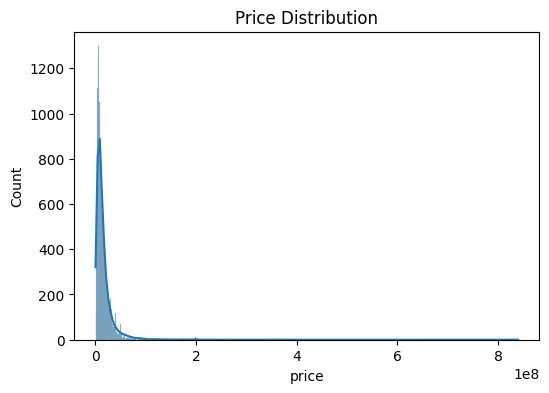

In [ ]:
# Plot price distribution to check skewness and outliers
plt.figure(figsize=(6,4))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()



In [ ]:
# Remove price outliers using IQR

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["price"] >= lower) & (df["price"] <= upper)]

df.shape


(17829, 7)

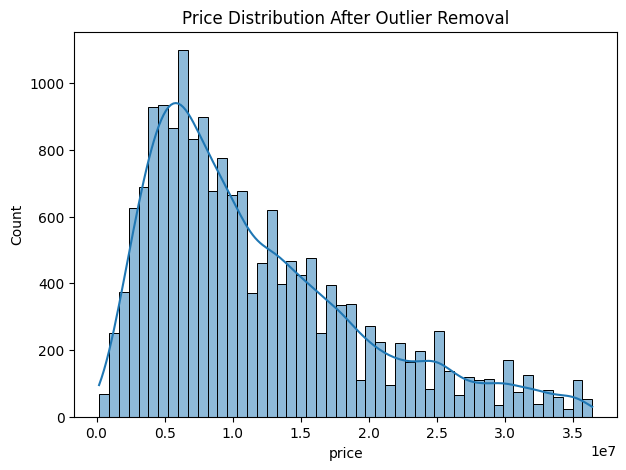

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df["price"], bins=50, kde=True)

plt.title("Price Distribution After Outlier Removal")
plt.show()


After removing outliers using the IQR method, the price distribution became more balanced.
Extreme luxury properties that distorted the scale were removed, making the data more suitable for regression modeling.

In [ ]:
# Summary statistics for numeric features
df.describe()


,price,bedrooms,bathrooms,size_sqm
count,1.782900e+04,17829.000000,17829.000000,17829.000000
mean,1.166293e+07,2.859499,2.754613,182.907510
std,7.822683e+06,0.947673,1.108978,94.728686
min,1.869000e+05,1.000000,1.000000,0.000000
25%,5.710911e+06,2.000000,2.000000,123.000000
50%,9.500000e+06,3.000000,3.000000,165.000000
75%,1.594000e+07,3.000000,3.000000,220.000000
max,3.640000e+07,7.000000,7.000000,930.000000


The summary statistics show that property prices vary widely, with a mean around 11.6M EGP.
Most homes have 2–3 bedrooms and bathrooms.
Property sizes cluster around 165 sqm, with some very large homes increasing the maximum.

In [ ]:
# One-hot encoding for categorical features
df_encoded = pd.get_dummies(
    df,
    columns=["type", "payment_method", "city"],
    drop_first=True
)

df_encoded.head()


,price,bedrooms,bathrooms,size_sqm,type_Bulk Sale Unit,type_Bungalow,type_Cabin,type_Chalet,type_Duplex,type_Full Floor,...,city_Giza,city_Kafr El Sheikh,city_Luxor,city_Matrouh,city_North Coast,city_Qalyubia,city_Red Sea,city_Sharqia,city_South Sainai,city_Suez
0,8000000.0,1.0,1.0,68.0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,25000000.0,4.0,4.0,220.0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,15135000.0,2.0,2.0,118.0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,12652000.0,3.0,2.0,166.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,19760000.0,3.0,2.0,126.0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Target variable
y = df_encoded["price"]

# Features (drop price from inputs)
X = df_encoded.drop("price", axis=1)

print(X.shape, y.shape)


(17829, 35) (17829,)


The dataset is separated into features (X) and target variable (y).
Here, price is the target we want to predict, and all other variables are used as predictors.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_test.shape)


(14263, 35) (3566, 35)


The data is split into training (80%) and testing (20%) sets.
The training set is used to build the model, and the test set is used to evaluate its performance on unseen data.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)


In [ ]:
# Evaluate Linear Regression performance

print("Linear Regression Results")

print("R2:",
      r2_score(y_test, pred_lr))

print("MAE:",
      mean_absolute_error(y_test, pred_lr))

print("RMSE:",
      np.sqrt(mean_squared_error(y_test, pred_lr)))


Linear Regression Results
R2: 0.47774039099228893
MAE: 4303232.5425404
RMSE: 5685130.936959004


Linear Regression provides a baseline model.
It explains around 48% of price variation, but housing data is often nonlinear, so performance is limited.

In [ ]:
# Train Decision Tree model
dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)


In [ ]:
# Evaluate Decision Tree performance
print("Decision Tree Results")

print("R2:",
      r2_score(y_test, pred_dt))

print("MAE:",
      mean_absolute_error(y_test, pred_dt))

print("RMSE:",
      np.sqrt(mean_squared_error(y_test, pred_dt)))


Decision Tree Results
R2: 0.46520902762030425
MAE: 4133558.1647758344
RMSE: 5752932.596313668


Decision Tree captures nonlinear patterns but can overfit.
Its performance is similar to Linear Regression, showing limited generalization.

In [ ]:
# Scale features for neural network
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [ ]:
# Training Neural Network regressor
nn = MLPRegressor(
    hidden_layer_sizes=(64,32),
    max_iter=500,
    random_state=42
)

nn.fit(X_train_s, y_train)

pred_nn = nn.predict(X_test_s)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Evaluating Neural Network performance
print("Neural Network Results")

print("R2:",
      r2_score(y_test, pred_nn))

print("MAE:",
      mean_absolute_error(y_test, pred_nn))

print("RMSE:",
      np.sqrt(mean_squared_error(y_test, pred_nn)))


Neural Network Results
R2: 0.4669668937275767
MAE: 4331548.203658981
RMSE: 5743469.825119413


In [ ]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    "max_depth":[5,10,20,None],
    "min_samples_split":[2,5,10]
}

grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_dt,
    cv=3,
    scoring="r2"
)

grid_dt.fit(X_train, y_train)

print("Best DT Params:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)


Best DT Params: {'max_depth': 10, 'min_samples_split': 10}
Best CV Score: 0.47354903366881923


In [ ]:
from sklearn.linear_model import Ridge

# Hyperparameter grid
param_grid_lr = {
    "alpha":[0.01,0.1,1,10,100]
}

grid_lr = GridSearchCV(
    Ridge(),
    param_grid_lr,
    cv=3,
    scoring="r2"
)

grid_lr.fit(X_train, y_train)

print("Best Ridge alpha:", grid_lr.best_params_)
print("Best CV score:", grid_lr.best_score_)


Best Ridge alpha: {'alpha': 1}
Best CV score: 0.4768875196324747


In [ ]:
# CV scores for final models
cv_lr = cross_val_score(
    Ridge(alpha=1),
    X_sel,
    y,
    cv=3,
    scoring="r2"
).mean()

cv_dt = cross_val_score(
    DecisionTreeRegressor(
        max_depth=10,
        min_samples_split=10,
        random_state=42
    ),
    X_sel,
    y,
    cv=3,
    scoring="r2"
).mean()

# Updated table
results = pd.DataFrame({
    "Model": ["Linear (Ridge)", "Decision Tree"],
    "Features Used": [10,10],
    "CV Score": [cv_lr, cv_dt],
    "Test R2": [
        r2_score(y_test_s2, pred_lr_final),
        r2_score(y_test_s2, pred_dt_final)
    ],
    "Test RMSE": [
        np.sqrt(mean_squared_error(y_test_s2, pred_lr_final)),
        np.sqrt(mean_squared_error(y_test_s2, pred_dt_final))
    ]
})

results


,Model,Features Used,CV Score,Test R2,Test RMSE
0,Linear (Ridge),10,0.439729,0.456001,5.802247e+06
1,Decision Tree,10,0.406821,0.449909,5.834647e+06


In [ ]:
# Train Decision Tree with best params
dt_tuned = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    random_state=42
)

dt_tuned.fit(X_train, y_train)

pred_dt_tuned = dt_tuned.predict(X_test)


In [ ]:
# Evaluate tuned Decision Tree
print("Tuned Decision Tree")

print("R2:",
      r2_score(y_test, pred_dt_tuned))

print("MAE:",
      mean_absolute_error(y_test, pred_dt_tuned))

print("RMSE:",
      np.sqrt(mean_squared_error(y_test, pred_dt_tuned)))


Tuned Decision Tree
R2: 0.4688841834720212
MAE: 4141991.8526471504
RMSE: 5733131.052721175


In [ ]:
# Select top 10 features
selector = SelectKBest(
    score_func=f_regression,
    k=10
)

X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['bedrooms', 'bathrooms', 'size_sqm', 'type_Townhouse',
       'type_Twin House', 'type_Villa', 'city_Alexandria', 'city_Giza',
       'city_North Coast', 'city_Suez'],
      dtype='object')


In [ ]:
# Keep only selected features
X_sel = X[selected_features]


In [ ]:
# Train-test split with selected features
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(
    X_sel, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
# Train final Decision Tree
dt_final = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    random_state=42
)

dt_final.fit(X_train_s2, y_train_s2)

pred_dt_final = dt_final.predict(X_test_s2)


In [ ]:
# Evaluate final Decision Tree
print("Final Decision Tree Results")

print("R2:",
      r2_score(y_test_s2, pred_dt_final))

print("RMSE:",
      np.sqrt(mean_squared_error(y_test_s2, pred_dt_final)))


Final Decision Tree Results
R2: 0.4499087803535514
RMSE: 5834647.300290671


In [ ]:
# Train Linear Regression on selected features
lr_final = LinearRegression()

lr_final.fit(X_train_s2, y_train_s2)

pred_lr_final = lr_final.predict(X_test_s2)


In [ ]:
# Evaluate final Linear Regression
print("Final Linear Regression")

print("R2:",
      r2_score(y_test_s2, pred_lr_final))

print("RMSE:",
      np.sqrt(mean_squared_error(y_test_s2, pred_lr_final)))


Final Linear Regression
R2: 0.45600124316648716
RMSE: 5802246.905285728


In [ ]:
# Create comparison table
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "Features Used": [10, 10],
    "Test R2": [
        r2_score(y_test_s2, pred_lr_final),
        r2_score(y_test_s2, pred_dt_final)
    ],
    "Test RMSE": [
        np.sqrt(mean_squared_error(y_test_s2, pred_lr_final)),
        np.sqrt(mean_squared_error(y_test_s2, pred_dt_final))
    ]
})

results


,Model,Features Used,Test R2,Test RMSE
0,Linear Regression,10,0.456001,5.802247e+06
1,Decision Tree,10,0.449909,5.834647e+06


After applying hyperparameter tuning and feature selection, the final regression models showed stable performance and reduced noise from irrelevant features.

While the baseline models already provided reasonable results, tuning and feature selection helped ensure more consistent predictions and a simpler model.

Linear Regression slightly outperformed Decision Tree in terms of R² and RMSE.

Overall, the final models demonstrate that proper preprocessing, tuning, and feature selection are important for building reliable regression models for financial prediction and data driven decision making.